In [65]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [66]:
df = pd.read_csv('..\\..\\Dataset\\testes\\dataset_casos_mensais_publicacao.csv', 
                    parse_dates=['dt_notificacao'],
                    usecols=['dt_notificacao', 'cd_municipio', 'temp_media_mensal']
                )
df = df.sort_values('dt_notificacao')

municipio_campinas = df[
          (df['cd_municipio'] == 350950) 
        & (df['dt_notificacao'] >= '2018-03-01') 
        & (df['dt_notificacao'] <= '2023-12-01')

        ]

municipio_sao_paulo = df[
          (df['cd_municipio'] == 355030) 
        & (df['dt_notificacao'] >= '2018-03-01') 
        & (df['dt_notificacao'] <= '2023-12-01')

        ]

df = pd.read_csv('..\\..\\Dataset\\testes\\dataset_casos_mensais_sem_municipio_sem_sp.csv', 
                    parse_dates=['dt_notificacao'],
                    usecols=['dt_notificacao', 'qntd_casos', 'temp_media_mensal']
                )
df = df.sort_values('dt_notificacao')

total_sem_sao_paulo = df[
       
        (df['dt_notificacao'] >= '2018-03-01') 
        & (df['dt_notificacao'] <= '2023-12-01')

        ]

df = pd.read_csv('..\\..\\Dataset\\testes\\dataset_casos_mensais_sem_municipio.csv', 
                    parse_dates=['dt_notificacao'],
                    usecols=['dt_notificacao', 'qntd_casos', 'temp_media_mensal', 'precipitacao_total_mensal']
                )
df = df.sort_values('dt_notificacao')

total = df[
          (df['dt_notificacao'] >= '2018-03-01') 
        & (df['dt_notificacao'] <= '2023-12-01')

        ]

In [67]:
municipio_campinas.set_index('dt_notificacao', inplace=True)
#municipio_campinas.fillna(method='ffill', inplace=True)

municipio_sao_paulo.set_index('dt_notificacao', inplace=True)
#municipio_sao_paulo.fillna(method='ffill', inplace=True)

total_sem_sao_paulo.set_index('dt_notificacao', inplace=True)
#total_sem_sao_paulo.fillna(method='ffill', inplace=True)

total.set_index('dt_notificacao', inplace=True)
#total.fillna(method='ffill', inplace=True)

In [68]:
camp = municipio_campinas['temp_media_mensal']
sp = municipio_sao_paulo['temp_media_mensal']
notsp = total_sem_sao_paulo['temp_media_mensal']
total = total['temp_media_mensal']

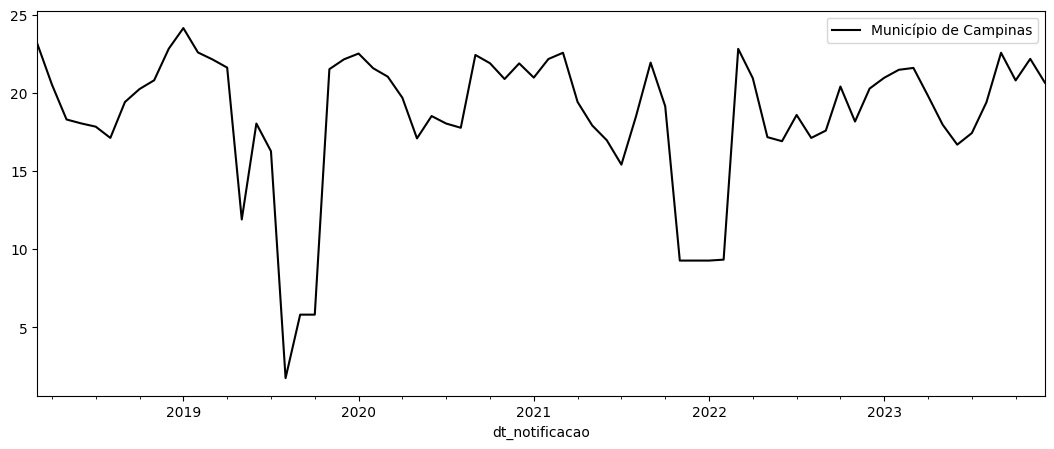

In [69]:
fig, ax = plt.subplots(figsize=(13, 5))

camp.plot(ax=ax, label='Município de Campinas', color='black')

ax.legend()

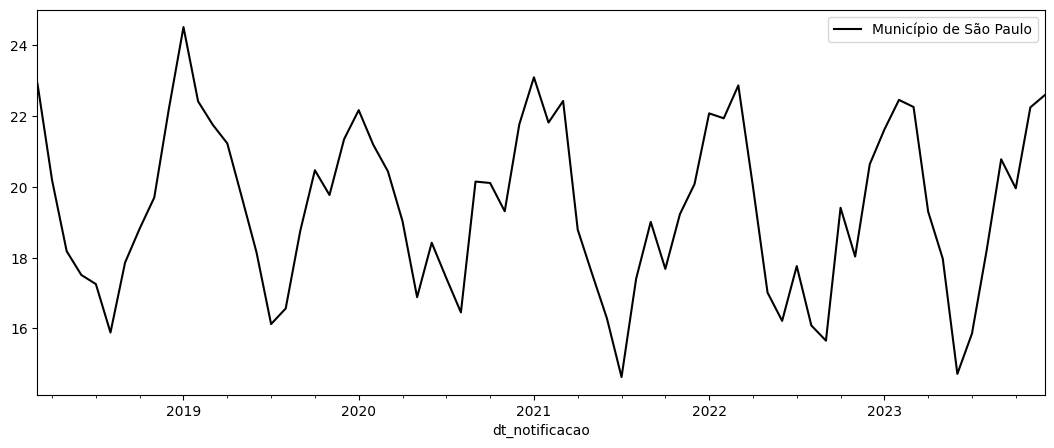

In [70]:
fig, ax = plt.subplots(figsize=(13, 5))

sp.plot(ax=ax, label='Município de São Paulo', color='black')

ax.legend()

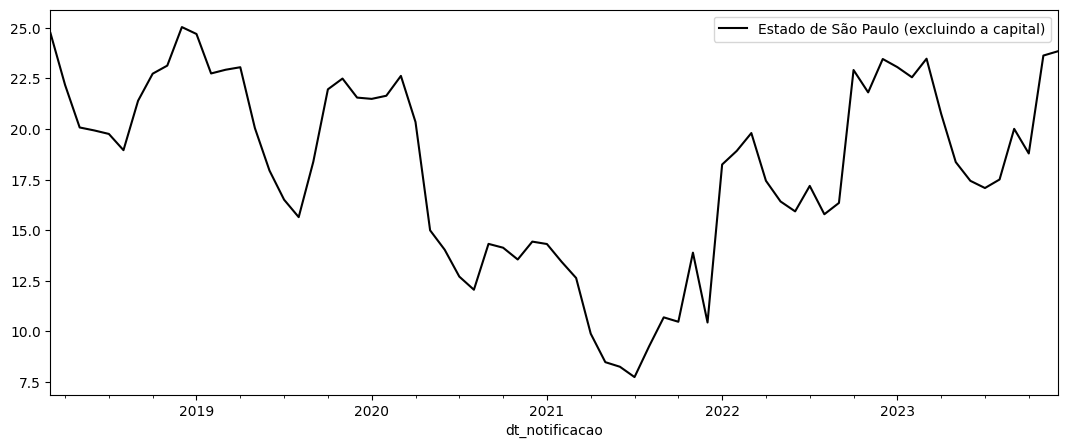

In [71]:
fig, ax = plt.subplots(figsize=(13, 5))


notsp.plot(ax=ax, label='Estado de São Paulo (excluindo a capital)', color='black')


ax.legend()

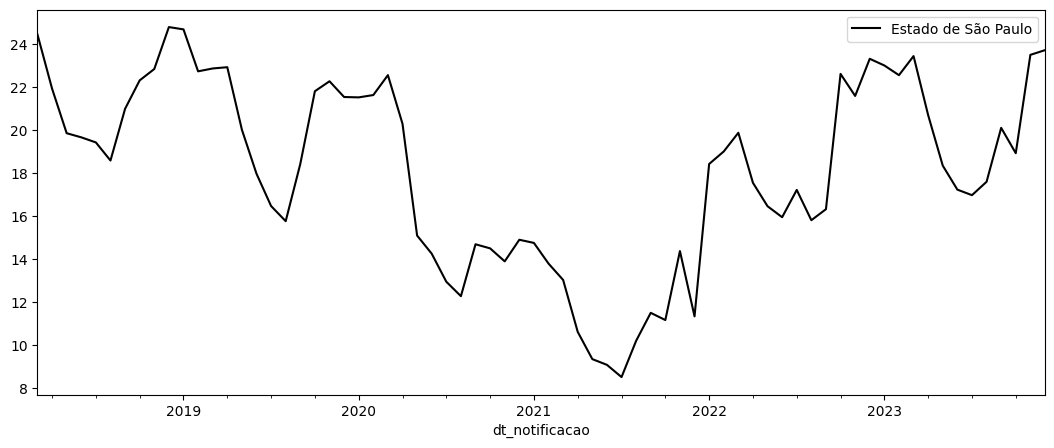

In [72]:
fig, ax = plt.subplots(figsize=(13, 5))

total.plot(ax=ax, label='Estado de São Paulo', color='black')

ax.legend()

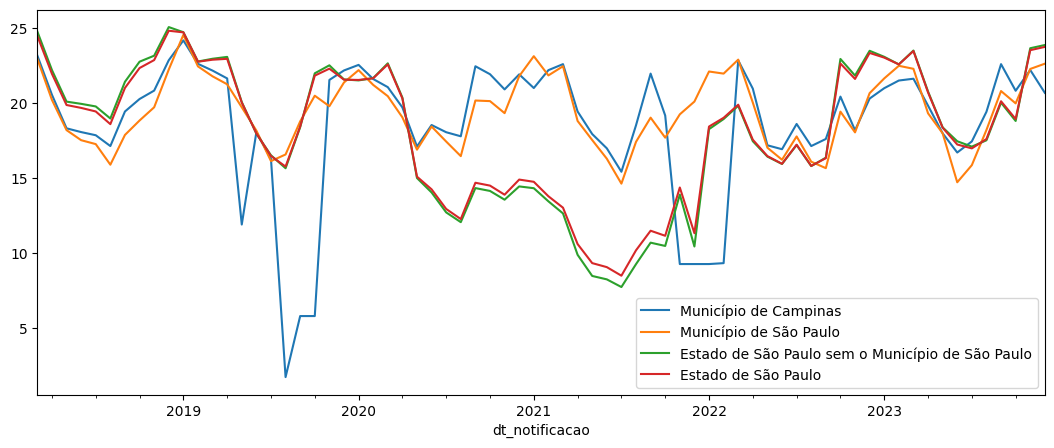

In [73]:
fig, ax = plt.subplots(figsize=(13, 5))

camp.plot(ax=ax, label='Município de Campinas')
sp.plot(ax=ax, label='Município de São Paulo')
notsp.plot(ax=ax, label='Estado de São Paulo sem o Município de São Paulo')
total.plot(ax=ax, label='Estado de São Paulo')

ax.legend()